In [492]:
import numpy as np
import matplotlib.pyplot as plt
from parse import parse
import cv2

In [176]:
train_images, train_labels = parse('facedata/facedatatrain', 'facedata/facedatatrainlabels', False)
validation_images, validation_labels = parse('facedata/facedatavalidation', 'facedata/facedatavalidationlabels', False)
test_images, test_labels = parse('facedata/facedatatest', 'facedata/facedatatestlabels', False)

In [81]:
train_images, train_labels = parse('digitdata/trainingimages', 'digitdata/traininglabels', True)
validation_images, validation_labels = parse('digitdata/validationimages', 'digitdata/validationlabels', True)
test_images, test_labels = parse('digitdata/testimages', 'digitdata/testlabels', True)

In [235]:
base_rate_true = np.bincount(train_labels)/train_labels.shape[0]
print(base_rate_true)

[0.51884701 0.48115299]


In [686]:
kernel = np.ones((7,3))
images = np.swapaxes(np.swapaxes(train_images.astype(np.float64), 0, 2), 0, 1)
dst = cv2.filter2D(src = images, ddepth = -1, kernel = kernel, anchor = (0,0))
zones = dst[::7,::6,:]

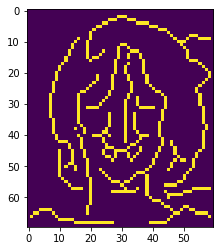

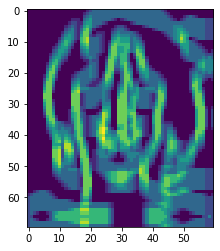

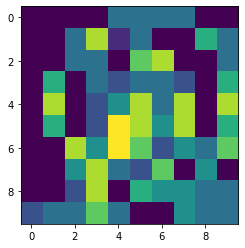

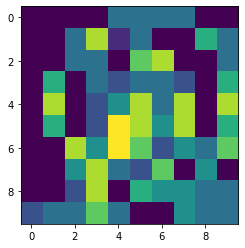

In [687]:
a = 0
plt.imshow(train_images[a,:,:])
plt.show()
plt.imshow(dst[:,:,a])
plt.show()
plt.imshow(dst[::7,::6,a])
plt.show()
plt.imshow(zones[:,:,a])

In [580]:
zones[:,:,a]

array([[0., 0., 0., 0., 0., 6., 0., 0., 0., 0.],
       [0., 0., 0., 1., 3., 0., 3., 3., 3., 3.],
       [0., 0., 5., 5., 2., 6., 5., 0., 1., 3.],
       [0., 0., 0., 0., 0., 3., 3., 0., 0., 1.],
       [0., 5., 0., 4., 3., 3., 5., 3., 0., 6.],
       [0., 3., 0., 2., 1., 7., 0., 7., 0., 0.],
       [0., 0., 4., 6., 8., 7., 7., 7., 2., 1.],
       [0., 0., 2., 7., 4., 0., 4., 2., 4., 5.],
       [0., 0., 3., 2., 1., 7., 1., 0., 6., 3.],
       [2., 3., 0., 3., 0., 0., 0., 3., 3., 3.]])

In [680]:
def get_feature_probs(images = train_images, labels = train_labels, dim = (7,6), stride = -1, kernel = -1):

    labels = train_labels.astype(bool)

    if stride == -1:
        stride = dim

    if kernel == -1:
        kernel = np.ones(dim)

    pixel_quant = dim[0]*dim[1]

    kernel = np.ones(dim)
    images = np.swapaxes(np.swapaxes(images.astype(np.float64), 0, 2), 0, 1)
    dst = cv2.filter2D(src = images, ddepth = -1, kernel = kernel)

    zones = dst[::stride[0],::stride[1],:].astype(int)
    zones = np.reshape(zones, (zones.shape[0]*zones.shape[1], 451))

    zone_probs = np.zeros((zones.shape[0], pixel_quant, 2))

    for i, zone in enumerate(zones):
        quant_false = np.bincount(zone[np.invert(labels)])
        quant_false = np.pad(quant_false, (0, pixel_quant - quant_false.shape[0]), constant_values = 0)
        quant_false = quant_false/np.sum(quant_false)

        quant_true = np.bincount(zone[labels])
        quant_true = np.pad(quant_true, (0, pixel_quant - quant_true.shape[0]), constant_values = 0)
        quant_true = quant_true/np.sum(quant_true)

        zone_probs[i, :, 0], zone_probs[i, :, 1] = quant_false, quant_true

        zeros = zone_probs == 0
        zone_probs[zeros] = 0.000001

    return zone_probs

In [681]:
def get_features(images = train_images, dim = (7,6), stride = -1, kernel = -1):
    if stride == -1:
        stride = dim

    if kernel == -1:
        kernel = np.ones(dim)

    pixel_quant = dim[0]*dim[1]

    kernel = np.ones(dim)
    images = np.swapaxes(np.swapaxes(images.astype(np.float64), 0, 2), 0, 1)
    dst = cv2.filter2D(src = images, ddepth = -1, kernel = kernel)

    zones = dst[::stride[0],::stride[1],:].astype(int)
    zones = np.reshape(zones, (zones.shape[0]*zones.shape[1], 451))

    

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_17340/38671275.py, line 1)

In [683]:
images = train_images 
labels = train_labels
dim = (7,6) 
stride = -1 
kernel = -1

if stride == -1:
    stride = dim

if kernel == -1:
    kernel = np.ones(dim)

pixel_quant = dim[0]*dim[1]

kernel = np.ones(dim)
images = np.swapaxes(np.swapaxes(images.astype(np.float64), 0, 2), 0, 1)
dst = cv2.filter2D(src = images, ddepth = -1, kernel = kernel)

zones = dst[::stride[0],::stride[1],:].astype(int)
zones = np.reshape(zones, (zones.shape[0]*zones.shape[1], 451))

In [677]:
zone_probs = get_feature_probs(train_images, train_labels, dim=(7,6), stride = -1, kernel = -1)

In [679]:
zone_probs.shape

(100, 42, 2)

In [620]:
np.pad(quantities, (0, pixel_probs[:,0].shape[0] - quantities.shape[0]), constant_values = 0)

array([298,   0,  11,   0,  15,   0,  13,   0,   8,   0,  64,   0,  23,
         0,  16,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0], dtype=int64)

In [634]:
np.bincount(zones[0,0,:])

array([298,   0,  11,   0,  15,   0,  13,   0,   8,   0,  64,   0,  23,
         0,  16,   0,   3], dtype=int64)

In [602]:
zones.shape

(10, 10, 451)

In [603]:
10*10*451

45100

In [600]:
zones[0,0,:]

array([ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0, 10,  0,
        0,  0, 10,  0, 12, 10,  0, 16,  0,  0,  0,  0, 10,  0,  0, 10,  0,
        0,  6,  0,  0,  0,  0, 10,  0,  0,  8,  0,  0,  4,  8,  0,  4,  0,
       10, 16, 10,  6,  6,  0,  0, 10,  0,  0,  0,  0,  6,  2,  0,  0,  0,
        0,  0,  0, 10,  0, 10,  0,  0,  0, 10,  0,  0,  0,  0, 10,  0,  0,
        0,  8,  0, 12, 12, 10,  0, 10, 10,  0, 10,  0,  0,  0,  0,  0,  0,
        0, 10,  0, 10,  4,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  6, 10,
        0, 10,  0, 10,  8,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0, 10,
        0,  0,  0,  0, 12,  0, 10,  0, 10, 10,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 12,  0,  0,  0, 14, 12,  0,  0,  6,  0,  0,  0, 10,  0,  0,
       10, 12,  0, 10,  2,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  2, 10,
        0,  4,  0, 10,  0, 10,  0,  0,  0,  0,  6, 10, 12, 10,  2,  0,  0,
        0, 10,  0,  0,  0,  0, 12,  0,  0,  0,  0,  4,  0,  2,  0, 12, 12,
        4,  4,  6,  0,  0

In [ ]:
num_black_pixels = np.sum(images, axis = (1,2))

In [277]:
def black_pixels_in_zone(images, labels, roi):
    images = images[:, roi[0]:roi[2], roi[1]:roi[3]]

    pixels_in_zone = images[0].shape[0]*images[0].shape[1]
    # print(pixels_in_zone)
    black_pixels_prob = np.zeros((pixels_in_zone , 2))

    for index in range(0, pixels_in_zone):
        black_pixels_prob[index, 1] = np.sum(np.sum(images[labels.astype(bool)], axis = (1, 2)) == index)/labels[labels.astype(bool)].shape[0]
        black_pixels_prob[index, 0] = np.sum(np.sum(images[np.invert(labels.astype(bool))], axis = (1, 2)) == index)/images[np.invert(labels.astype(bool))].shape[0]

    return black_pixels_prob

In [344]:
def zone_sum_prob(images, labels, num_of_zones):
    div = np.sqrt(num_of_zones)

    height = int(images[0].shape[0] // div)
    width = int(images[0].shape[1] // div)
    # number_of_zones = height * width
    # print(type(height))
    probs = []

    i = 0 
    j = 0 - width
    for index in range(0, num_of_zones):

        if index % div == 0:
            j += width
            i = 0
        else:
            i += height

        zone_prob = black_pixels_in_zone(images, labels, [i, j, i + height, j + width])
        probs.append(zone_prob)
   
    # print(len(probs))
    for index, prob in enumerate(probs):
        # print(prob.shape)
        if prob.shape[0] == 0:
            print(index)
    # print(probs)
    return np.stack(probs, axis = 0)




In [481]:
def zone_sum(images, num_of_zones):
    div = np.sqrt(num_of_zones)

    height = int(images[0].shape[0] // div)
    width = int(images[0].shape[1] // div)
    # number_of_zones = height * width
    # print(type(height))
    sums = []

    i = 0 
    j = 0 - width
    for index in range(0, num_of_zones):
        if index % div == 0:
            j += width
            i = 0
        else:
            i += height

        zone_sum  = np.sum(images[:,i:i+height, j:j+width], axis =(1, 2))
        sums.append(zone_sum)

    return np.stack(sums, axis = 1)

In [479]:
def get_preds(images, num_of_zones, probs):
    zone_sums = zone_sum(images, num_of_zones)
    image_zone_probs = probs[zone_sums[:,:], zone_sums[:],:]

    zeros = image_zone_probs == 0
    image_zone_probs[zeros] = 0.000001
    image_zone_probs = np.prod(image_zone_probs, axis = 1)

    preds = image_zone_probs[:,0]*base_rate_true[0] < image_zone_probs[:,1]*base_rate_true[1]

    return preds

In [486]:
zone_probs = zone_sum_prob(train_images, train_labels, 100)
zone_sums = zone_sum(train_images, 100)
image_zone_probs = zone_probs[zone_sums[:,:], zone_sums[:],:]

In [487]:
zeros = image_zone_probs == 0
image_zone_probs[zeros] = 0.000001
image_zone_probs = np.prod(image_zone_probs, axis = 1)

In [488]:
preds = image_zone_probs[:,0]*base_rate_true[0] < image_zone_probs[:,1]*base_rate_true[1]
np.sum(preds == train_labels)/train_labels.shape[0]

0.516629711751663

In [489]:
np.bincount(preds)

array([450,   1], dtype=int64)

In [484]:
zone_probs = zone_sum_prob(validation_images, validation_labels, 100)
np.sum(get_preds(validation_images, 100, zone_probs)== validation_labels)/validation_labels.shape[0]

0.5149501661129569

In [ ]:
predictions = num_pixels_prob[num_pixels_validation, 0] * base_rate_true[0] < num_pixels_prob[num_pixels_validation, 1] * base_rate_true[0]
np.sum(predictions == validation_labels)/validation_labels.shape[0]

In [220]:
num_pixels_prob_1 = black_pixels_in_zone(train_images, train_labels, [0, 0, 7, 6])

In [227]:
num_pixels_prob_1[np.argmax(num_pixels_prob_1[:,0])]

array([0.48717949, 0.53917051])

In [229]:
predictions = num_pixels_prob_1[num_pixels, 0] * base_rate_true[0] < num_pixels_prob_1[num_pixels, 1] * base_rate_true[0]
np.sum(predictions == train_labels)/train_labels.shape[0]

0.5188470066518847

In [209]:
base_rate_true

array([0.51884701, 0.48115299])

In [187]:
num_pixels = np.sum(train_images, axis = (1, 2))

In [188]:
num_pixels.shape

(451,)

In [231]:
pixels_in_image = train_images[0].shape[0]*train_images[0].shape[1]
num_pixels_prob = np.zeros((pixels_in_image, 2))
for index in range(0, pixels_in_image):
    num_pixels_prob[index, 1] = np.sum(np.sum(train_images[train_labels.astype(bool)], axis = (1, 2)) == index)/train_labels[train_labels.astype(bool)].shape[0]
    num_pixels_prob[index, 0] = np.sum(np.sum(train_images[np.invert(train_labels.astype(bool))], axis = (1, 2)) == index)/train_images[np.invert(train_labels.astype(bool))].shape[0]

In [232]:
predictions = num_pixels_prob[num_pixels, 0] * base_rate_true[0] < num_pixels_prob[num_pixels, 1] * base_rate_true[0]
np.sum(predictions == train_labels)/train_labels.shape[0]

0.8248337028824834

In [210]:
num_pixels_validation = np.sum(validation_images, axis = (1, 2))

In [233]:
predictions = num_pixels_prob[num_pixels_validation, 0] * base_rate_true[0] < num_pixels_prob[num_pixels_validation, 1] * base_rate_true[0]
np.sum(predictions == validation_labels)/validation_labels.shape[0]

0.6046511627906976

In [203]:
train_labels[train_labels.astype(bool)].shape[0]

217

In [199]:
train_images[train_labels].shape[0]

451

In [204]:
np.sum(np.sum(train_images[train_labels], axis = (1, 2)) == 728)/train_labels[train_labels.astype(bool)].shape[0]

1.0

In [182]:
np.sum(np.sum(train_images[train_labels], axis = (1, 2)) == 422)/train_images[train_labels].shape[0]

0.0

In [186]:
np.argmax(num_pixels_prob[:, 1])

0